<a href="https://colab.research.google.com/github/yanliu1111/pytorch-deep-learning/blob/main/machine-learning-projects/kmeans/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from collections import defaultdict
from random import uniform
from math import sqrt

In [27]:
def point_avg(points):
    """
    Accepts a list of points, each with the same number of dimensions.
    NB. points can have more dimensions than 2

    Returns a new point which is the center of all the points.
    """
    dimensions = len(points[0])

    new_center = []

    for dimension in range(dimensions): # xrange replaced with range
        dim_sum = 0  # dimension sum
        for p in points:
            dim_sum += p[dimension]

        # average of each dimension
        new_center.append(dim_sum / float(len(points)))

    return new_center

In [28]:
def update_centers(data_set, assignments):
    """
    Accepts a dataset and a list of assignments; the indexes
    of both lists correspond to each other.

    Compute the center for each of the assigned groups.

    Return `k` centers where `k` is the number of unique assignments.
    """
    new_means = defaultdict(list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)

    # Replace itervalues() with values()
    for points in new_means.values():
        centers.append(point_avg(points))

    return centers

In [29]:
def assign_points(data_points, centers):
    """
    Given a data set and a list of points betweeen other points,
    assign each point to an index that corresponds to the index
    of the center point on it's proximity to that point.
    Return a an array of indexes of centers that correspond to
    an index in the data set; that is, if there are N points
    in `data_set` the list we return will have N elements. Also
    If there are Y points in `centers` there will be Y unique
    possible values within the returned list.
    """
    assignments = []
    for point in data_points:
        shortest = float('inf')
        shortest_index = 0
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if val < shortest:
                shortest = val
                shortest_index = i
        assignments.append(shortest_index)
    return assignments

In [30]:
def distance(a, b):
    """
    """
    dimensions = len(a)

    _sum = 0
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    return sqrt(_sum)

In [31]:
def generate_k(data_set, k):
    """
    Given `data_set`, which is an array of arrays,
    find the minimum and maximum for each coordinate, a range.
    Generate `k` random points between the ranges.
    Return an array of the random points within the ranges.
    """
    centers = []
    dimensions = len(data_set[0])
    min_max = defaultdict(int)

    for point in data_set:
        for i in range(dimensions):
            val = point[i]
            min_key = 'min_%d' % i
            max_key = 'max_%d' % i
            if min_key not in min_max or val < min_max[min_key]:
                min_max[min_key] = val
            if max_key not in min_max or val > min_max[max_key]:
                min_max[max_key] = val

    for _k in range(k):
        rand_point = []
        for i in range(dimensions):
            min_val = min_max['min_%d' % i]
            max_val = min_max['max_%d' % i]

            rand_point.append(uniform(min_val, max_val))

        centers.append(rand_point)

    return centers

In [32]:
def k_means(dataset, k):
    k_points = generate_k(dataset, k)
    assignments = assign_points(dataset, k_points)
    old_assignments = None
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)
    return zip(assignments, dataset)

In [35]:
points = [
    [1, 2],
    [2, 1],
    [3, 1],
    [5, 4],
    [5, 5],
    [6, 5],
    [10, 8],
    [7, 9],
    [11, 5],
    [14, 9],
    [14, 14],
    ]
results = k_means(points, 3)  # Store the zip object in a variable

# Iterate through the results and print them
for cluster, point in results:
    print(f"Point: {point} belongs to Cluster: {cluster}")

Point: [1, 2] belongs to Cluster: 0
Point: [2, 1] belongs to Cluster: 0
Point: [3, 1] belongs to Cluster: 0
Point: [5, 4] belongs to Cluster: 0
Point: [5, 5] belongs to Cluster: 0
Point: [6, 5] belongs to Cluster: 0
Point: [10, 8] belongs to Cluster: 1
Point: [7, 9] belongs to Cluster: 2
Point: [11, 5] belongs to Cluster: 1
Point: [14, 9] belongs to Cluster: 1
Point: [14, 14] belongs to Cluster: 1


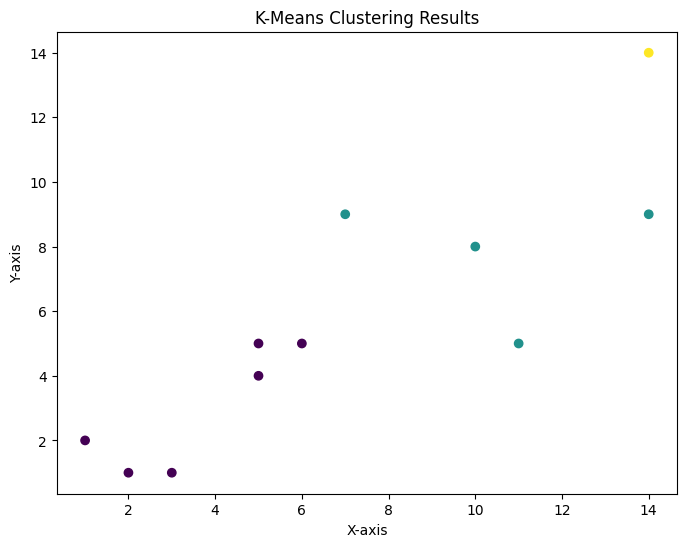

In [37]:
import matplotlib.pyplot as plt

# ... (your existing code) ...

results = list(k_means(points, 3))  # Convert results to a list to preserve data

# Extract cluster assignments and data points for plotting
cluster_assignments = [cluster for cluster, _ in results]
data_points = [point for _, point in results]

# Create scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(
    [p[0] for p in data_points],  # x-coordinates
    [p[1] for p in data_points],  # y-coordinates
    c=cluster_assignments,  # Color points by cluster assignment
    cmap="viridis",  # Choose a colormap (e.g., "viridis", "plasma")
)
plt.title("K-Means Clustering Results")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()